# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [6]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

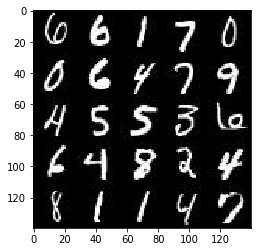

In [7]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

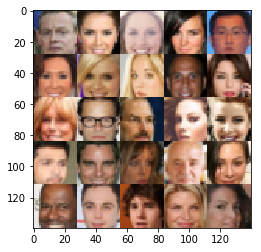

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [10]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    learning_rate = 0.002
    # TODO: Implement Function
#     print(str(image_width)+'*'+str(image_height)+'*'+str(image_channels))

    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [11]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [12]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [13]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [16]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                    
       

    
    
    return losses
                
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 5.0666... Generator Loss: 0.0595
Epoch 1/2... Discriminator Loss: 1.7706... Generator Loss: 0.5602
Epoch 1/2... Discriminator Loss: 1.7906... Generator Loss: 0.9224
Epoch 1/2... Discriminator Loss: 0.3719... Generator Loss: 3.0860
Epoch 1/2... Discriminator Loss: 0.4250... Generator Loss: 1.8394
Epoch 1/2... Discriminator Loss: 0.3414... Generator Loss: 2.4507
Epoch 1/2... Discriminator Loss: 0.6975... Generator Loss: 2.0729
Epoch 1/2... Discriminator Loss: 0.1443... Generator Loss: 2.2521
Epoch 1/2... Discriminator Loss: 0.3310... Generator Loss: 2.2011
Epoch 1/2... Discriminator Loss: 0.2259... Generator Loss: 2.2323


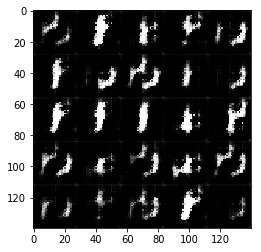

Epoch 1/2... Discriminator Loss: 0.6238... Generator Loss: 1.5568
Epoch 1/2... Discriminator Loss: 0.2194... Generator Loss: 4.3347
Epoch 1/2... Discriminator Loss: 1.0239... Generator Loss: 1.3993
Epoch 1/2... Discriminator Loss: 0.3635... Generator Loss: 2.3423
Epoch 1/2... Discriminator Loss: 0.5400... Generator Loss: 1.4566
Epoch 1/2... Discriminator Loss: 0.3798... Generator Loss: 6.8914
Epoch 1/2... Discriminator Loss: 1.6818... Generator Loss: 8.4810
Epoch 1/2... Discriminator Loss: 0.9504... Generator Loss: 1.0776
Epoch 1/2... Discriminator Loss: 0.4607... Generator Loss: 1.4700
Epoch 1/2... Discriminator Loss: 0.8831... Generator Loss: 1.2542


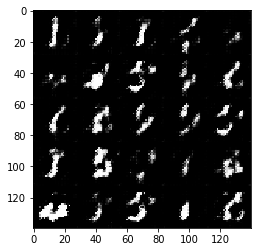

Epoch 1/2... Discriminator Loss: 1.5355... Generator Loss: 7.0773
Epoch 1/2... Discriminator Loss: 1.7069... Generator Loss: 6.9044
Epoch 1/2... Discriminator Loss: 0.5987... Generator Loss: 1.8583
Epoch 1/2... Discriminator Loss: 0.4549... Generator Loss: 2.0444
Epoch 1/2... Discriminator Loss: 0.4672... Generator Loss: 1.5694
Epoch 1/2... Discriminator Loss: 0.7864... Generator Loss: 2.3458
Epoch 1/2... Discriminator Loss: 0.7069... Generator Loss: 3.6142
Epoch 1/2... Discriminator Loss: 1.1748... Generator Loss: 0.8901
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 0.8650
Epoch 1/2... Discriminator Loss: 1.0815... Generator Loss: 0.7531


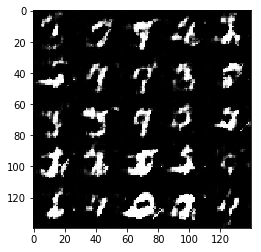

Epoch 1/2... Discriminator Loss: 0.7285... Generator Loss: 1.4669
Epoch 1/2... Discriminator Loss: 0.5450... Generator Loss: 1.4754
Epoch 1/2... Discriminator Loss: 0.8639... Generator Loss: 1.5302
Epoch 1/2... Discriminator Loss: 1.0924... Generator Loss: 3.8075
Epoch 1/2... Discriminator Loss: 0.7655... Generator Loss: 1.3021
Epoch 1/2... Discriminator Loss: 1.1384... Generator Loss: 0.7732
Epoch 1/2... Discriminator Loss: 0.5690... Generator Loss: 2.0968
Epoch 1/2... Discriminator Loss: 0.3938... Generator Loss: 1.9247
Epoch 1/2... Discriminator Loss: 0.9891... Generator Loss: 0.7551
Epoch 1/2... Discriminator Loss: 0.9110... Generator Loss: 0.8261


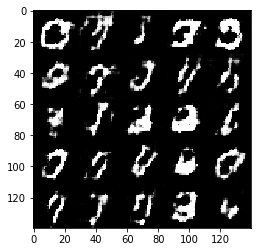

Epoch 1/2... Discriminator Loss: 0.8660... Generator Loss: 2.6563
Epoch 1/2... Discriminator Loss: 1.2497... Generator Loss: 0.6613
Epoch 1/2... Discriminator Loss: 0.7922... Generator Loss: 1.6732
Epoch 1/2... Discriminator Loss: 0.9632... Generator Loss: 1.9162
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 2.2094
Epoch 1/2... Discriminator Loss: 0.7156... Generator Loss: 1.6593
Epoch 1/2... Discriminator Loss: 1.2127... Generator Loss: 0.7838
Epoch 1/2... Discriminator Loss: 0.8222... Generator Loss: 1.6976
Epoch 1/2... Discriminator Loss: 0.6821... Generator Loss: 2.1390
Epoch 1/2... Discriminator Loss: 1.0123... Generator Loss: 0.8134


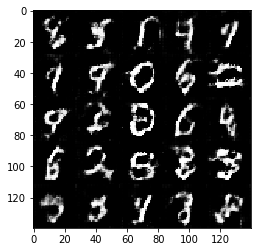

Epoch 1/2... Discriminator Loss: 0.5366... Generator Loss: 1.6710
Epoch 1/2... Discriminator Loss: 0.9010... Generator Loss: 0.8989
Epoch 1/2... Discriminator Loss: 1.5492... Generator Loss: 3.2849
Epoch 1/2... Discriminator Loss: 0.8291... Generator Loss: 2.1357
Epoch 1/2... Discriminator Loss: 1.1586... Generator Loss: 2.6168
Epoch 1/2... Discriminator Loss: 0.8525... Generator Loss: 1.2959
Epoch 1/2... Discriminator Loss: 0.6897... Generator Loss: 1.6856
Epoch 1/2... Discriminator Loss: 1.3145... Generator Loss: 2.7164
Epoch 1/2... Discriminator Loss: 0.9926... Generator Loss: 2.3512
Epoch 1/2... Discriminator Loss: 1.0701... Generator Loss: 1.9445


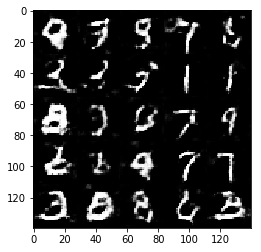

Epoch 1/2... Discriminator Loss: 0.8335... Generator Loss: 1.0210
Epoch 1/2... Discriminator Loss: 1.2689... Generator Loss: 0.5206
Epoch 1/2... Discriminator Loss: 1.2234... Generator Loss: 0.5902
Epoch 1/2... Discriminator Loss: 0.9075... Generator Loss: 0.7827
Epoch 1/2... Discriminator Loss: 0.8577... Generator Loss: 1.3326
Epoch 1/2... Discriminator Loss: 0.7822... Generator Loss: 1.0151
Epoch 1/2... Discriminator Loss: 0.8199... Generator Loss: 1.0559
Epoch 1/2... Discriminator Loss: 1.2003... Generator Loss: 2.0125
Epoch 1/2... Discriminator Loss: 1.2031... Generator Loss: 0.5163
Epoch 1/2... Discriminator Loss: 1.1487... Generator Loss: 0.6154


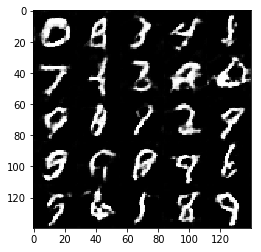

Epoch 1/2... Discriminator Loss: 1.1487... Generator Loss: 0.6910
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 0.5928
Epoch 1/2... Discriminator Loss: 1.0922... Generator Loss: 0.6814
Epoch 1/2... Discriminator Loss: 1.7352... Generator Loss: 2.6524
Epoch 1/2... Discriminator Loss: 0.7576... Generator Loss: 1.0932
Epoch 1/2... Discriminator Loss: 0.9043... Generator Loss: 2.5741
Epoch 1/2... Discriminator Loss: 0.8160... Generator Loss: 0.9442
Epoch 1/2... Discriminator Loss: 0.7390... Generator Loss: 1.8020
Epoch 1/2... Discriminator Loss: 0.8326... Generator Loss: 1.3698
Epoch 1/2... Discriminator Loss: 0.8981... Generator Loss: 0.9402


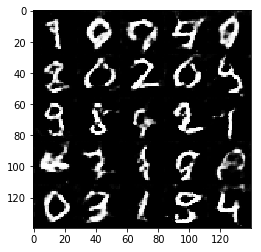

Epoch 1/2... Discriminator Loss: 1.5211... Generator Loss: 0.3849
Epoch 1/2... Discriminator Loss: 1.2264... Generator Loss: 0.5171
Epoch 1/2... Discriminator Loss: 2.0312... Generator Loss: 4.1332
Epoch 1/2... Discriminator Loss: 1.0776... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.1867... Generator Loss: 0.8644
Epoch 1/2... Discriminator Loss: 1.0739... Generator Loss: 0.5948
Epoch 1/2... Discriminator Loss: 0.7180... Generator Loss: 1.2211
Epoch 1/2... Discriminator Loss: 0.6685... Generator Loss: 1.5575
Epoch 1/2... Discriminator Loss: 1.7051... Generator Loss: 0.3076
Epoch 1/2... Discriminator Loss: 1.1202... Generator Loss: 1.1686


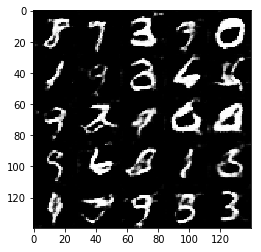

Epoch 1/2... Discriminator Loss: 0.8039... Generator Loss: 1.1312
Epoch 1/2... Discriminator Loss: 0.6620... Generator Loss: 1.3656
Epoch 1/2... Discriminator Loss: 1.1970... Generator Loss: 0.5745
Epoch 2/2... Discriminator Loss: 0.7606... Generator Loss: 1.0077
Epoch 2/2... Discriminator Loss: 0.8473... Generator Loss: 1.0620
Epoch 2/2... Discriminator Loss: 0.9164... Generator Loss: 0.7949
Epoch 2/2... Discriminator Loss: 1.2995... Generator Loss: 2.3554
Epoch 2/2... Discriminator Loss: 1.3870... Generator Loss: 0.4490
Epoch 2/2... Discriminator Loss: 0.8747... Generator Loss: 1.3054
Epoch 2/2... Discriminator Loss: 0.7708... Generator Loss: 1.7856


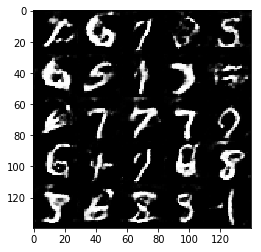

Epoch 2/2... Discriminator Loss: 0.7226... Generator Loss: 1.1931
Epoch 2/2... Discriminator Loss: 0.9589... Generator Loss: 0.7873
Epoch 2/2... Discriminator Loss: 1.2084... Generator Loss: 0.6459
Epoch 2/2... Discriminator Loss: 0.8663... Generator Loss: 1.0742
Epoch 2/2... Discriminator Loss: 1.7745... Generator Loss: 0.2877
Epoch 2/2... Discriminator Loss: 0.9773... Generator Loss: 0.7283
Epoch 2/2... Discriminator Loss: 1.1283... Generator Loss: 0.6422
Epoch 2/2... Discriminator Loss: 0.9849... Generator Loss: 0.9512
Epoch 2/2... Discriminator Loss: 0.7966... Generator Loss: 1.3156
Epoch 2/2... Discriminator Loss: 1.2593... Generator Loss: 0.4891


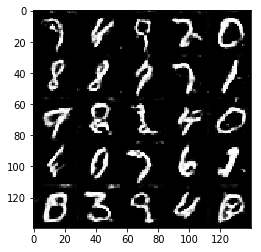

Epoch 2/2... Discriminator Loss: 1.5823... Generator Loss: 0.3674
Epoch 2/2... Discriminator Loss: 0.9764... Generator Loss: 2.9597
Epoch 2/2... Discriminator Loss: 0.8517... Generator Loss: 1.1293
Epoch 2/2... Discriminator Loss: 1.3145... Generator Loss: 2.1613
Epoch 2/2... Discriminator Loss: 1.3958... Generator Loss: 0.4667
Epoch 2/2... Discriminator Loss: 1.0999... Generator Loss: 0.7892
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 1.6385
Epoch 2/2... Discriminator Loss: 0.8842... Generator Loss: 0.8972
Epoch 2/2... Discriminator Loss: 1.1327... Generator Loss: 0.6200
Epoch 2/2... Discriminator Loss: 0.8408... Generator Loss: 1.1343


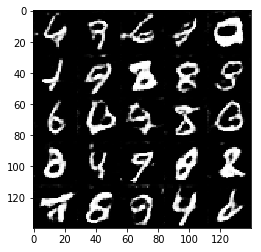

Epoch 2/2... Discriminator Loss: 0.9516... Generator Loss: 1.4872
Epoch 2/2... Discriminator Loss: 1.2859... Generator Loss: 0.5368
Epoch 2/2... Discriminator Loss: 1.3413... Generator Loss: 0.4598
Epoch 2/2... Discriminator Loss: 1.0008... Generator Loss: 0.7202
Epoch 2/2... Discriminator Loss: 0.6530... Generator Loss: 1.6211
Epoch 2/2... Discriminator Loss: 2.1932... Generator Loss: 0.2276
Epoch 2/2... Discriminator Loss: 1.1456... Generator Loss: 0.7523
Epoch 2/2... Discriminator Loss: 1.1594... Generator Loss: 0.6317
Epoch 2/2... Discriminator Loss: 1.2281... Generator Loss: 0.5623
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 0.7582


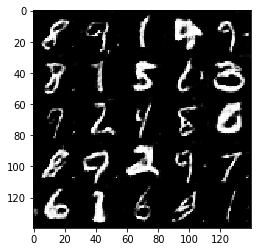

Epoch 2/2... Discriminator Loss: 0.9786... Generator Loss: 0.8005
Epoch 2/2... Discriminator Loss: 0.9354... Generator Loss: 1.3718
Epoch 2/2... Discriminator Loss: 1.1175... Generator Loss: 1.5884
Epoch 2/2... Discriminator Loss: 0.8997... Generator Loss: 2.2335
Epoch 2/2... Discriminator Loss: 0.8536... Generator Loss: 1.3091
Epoch 2/2... Discriminator Loss: 1.2644... Generator Loss: 2.7264
Epoch 2/2... Discriminator Loss: 0.7184... Generator Loss: 1.4592
Epoch 2/2... Discriminator Loss: 1.5312... Generator Loss: 0.3883
Epoch 2/2... Discriminator Loss: 0.7634... Generator Loss: 1.2799
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.5676


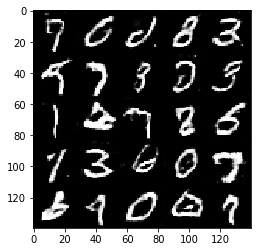

Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 0.7776
Epoch 2/2... Discriminator Loss: 0.5804... Generator Loss: 1.4061
Epoch 2/2... Discriminator Loss: 2.6835... Generator Loss: 0.1394
Epoch 2/2... Discriminator Loss: 0.7894... Generator Loss: 1.5657
Epoch 2/2... Discriminator Loss: 0.9678... Generator Loss: 0.9398
Epoch 2/2... Discriminator Loss: 1.0703... Generator Loss: 2.7938
Epoch 2/2... Discriminator Loss: 1.2141... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 0.6514... Generator Loss: 1.2426
Epoch 2/2... Discriminator Loss: 1.3553... Generator Loss: 3.7094
Epoch 2/2... Discriminator Loss: 1.4555... Generator Loss: 0.5262


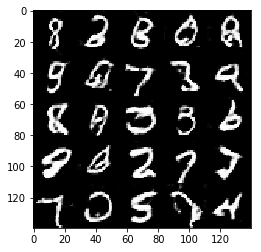

Epoch 2/2... Discriminator Loss: 0.8669... Generator Loss: 1.4782
Epoch 2/2... Discriminator Loss: 0.9555... Generator Loss: 0.7101
Epoch 2/2... Discriminator Loss: 1.0174... Generator Loss: 2.3074
Epoch 2/2... Discriminator Loss: 0.8176... Generator Loss: 1.0707
Epoch 2/2... Discriminator Loss: 1.0231... Generator Loss: 0.7439
Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 1.2385
Epoch 2/2... Discriminator Loss: 0.9614... Generator Loss: 0.7906
Epoch 2/2... Discriminator Loss: 1.1172... Generator Loss: 0.7259
Epoch 2/2... Discriminator Loss: 0.7991... Generator Loss: 1.1718
Epoch 2/2... Discriminator Loss: 2.3868... Generator Loss: 0.2117


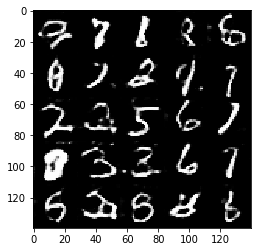

Epoch 2/2... Discriminator Loss: 1.2227... Generator Loss: 0.5818
Epoch 2/2... Discriminator Loss: 1.0203... Generator Loss: 0.7270
Epoch 2/2... Discriminator Loss: 0.6938... Generator Loss: 2.0510
Epoch 2/2... Discriminator Loss: 1.0337... Generator Loss: 0.7570
Epoch 2/2... Discriminator Loss: 0.8884... Generator Loss: 0.8621
Epoch 2/2... Discriminator Loss: 0.8773... Generator Loss: 1.1174
Epoch 2/2... Discriminator Loss: 0.9387... Generator Loss: 0.9416
Epoch 2/2... Discriminator Loss: 1.0429... Generator Loss: 0.7389
Epoch 2/2... Discriminator Loss: 0.9899... Generator Loss: 0.7201
Epoch 2/2... Discriminator Loss: 0.5317... Generator Loss: 2.3567


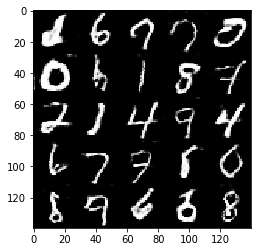

Epoch 2/2... Discriminator Loss: 1.4871... Generator Loss: 1.7003
Epoch 2/2... Discriminator Loss: 1.4193... Generator Loss: 0.4931
Epoch 2/2... Discriminator Loss: 1.2903... Generator Loss: 0.5325
Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.1849
Epoch 2/2... Discriminator Loss: 0.5889... Generator Loss: 1.2345
Epoch 2/2... Discriminator Loss: 0.8743... Generator Loss: 0.9311
Epoch 2/2... Discriminator Loss: 1.0672... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 1.0368... Generator Loss: 0.7376
Epoch 2/2... Discriminator Loss: 0.7065... Generator Loss: 1.0996
Epoch 2/2... Discriminator Loss: 2.0551... Generator Loss: 0.2197


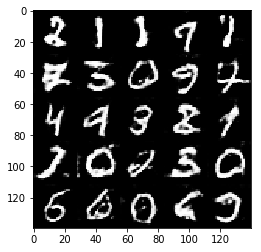

Epoch 2/2... Discriminator Loss: 0.5048... Generator Loss: 1.4031
Epoch 2/2... Discriminator Loss: 1.2139... Generator Loss: 0.6144
Epoch 2/2... Discriminator Loss: 0.8839... Generator Loss: 2.6646
Epoch 2/2... Discriminator Loss: 0.8974... Generator Loss: 2.6006
Epoch 2/2... Discriminator Loss: 0.4518... Generator Loss: 1.7391
Epoch 2/2... Discriminator Loss: 0.4058... Generator Loss: 1.6879
Epoch 2/2... Discriminator Loss: 4.0465... Generator Loss: 0.0438


In [17]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 7.6739
Epoch 1/1... Discriminator Loss: 0.6836... Generator Loss: 2.4475
Epoch 1/1... Discriminator Loss: 4.8401... Generator Loss: 8.0010
Epoch 1/1... Discriminator Loss: 3.0553... Generator Loss: 5.6045
Epoch 1/1... Discriminator Loss: 0.3239... Generator Loss: 4.1364
Epoch 1/1... Discriminator Loss: 0.0371... Generator Loss: 4.9232
Epoch 1/1... Discriminator Loss: 0.3267... Generator Loss: 3.2182
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 1.6015
Epoch 1/1... Discriminator Loss: 0.5886... Generator Loss: 1.1381
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 7.4933


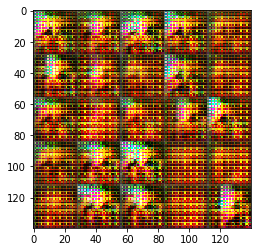

Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 7.2851
Epoch 1/1... Discriminator Loss: 0.0746... Generator Loss: 3.0318
Epoch 1/1... Discriminator Loss: 0.8780... Generator Loss: 1.4889
Epoch 1/1... Discriminator Loss: 1.6549... Generator Loss: 7.8361
Epoch 1/1... Discriminator Loss: 0.0862... Generator Loss: 3.3455
Epoch 1/1... Discriminator Loss: 0.0378... Generator Loss: 4.1919
Epoch 1/1... Discriminator Loss: 0.3416... Generator Loss: 3.2329
Epoch 1/1... Discriminator Loss: 0.3037... Generator Loss: 1.7632
Epoch 1/1... Discriminator Loss: 0.1446... Generator Loss: 2.5722
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 5.6159


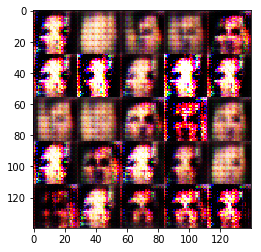

Epoch 1/1... Discriminator Loss: 0.2181... Generator Loss: 5.0673
Epoch 1/1... Discriminator Loss: 2.5350... Generator Loss: 0.3368
Epoch 1/1... Discriminator Loss: 0.5502... Generator Loss: 2.7568
Epoch 1/1... Discriminator Loss: 0.3317... Generator Loss: 2.2977
Epoch 1/1... Discriminator Loss: 0.8037... Generator Loss: 2.0913
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.5784
Epoch 1/1... Discriminator Loss: 0.7249... Generator Loss: 1.4450
Epoch 1/1... Discriminator Loss: 0.9647... Generator Loss: 1.1749
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 2.3786
Epoch 1/1... Discriminator Loss: 1.5144... Generator Loss: 1.5182


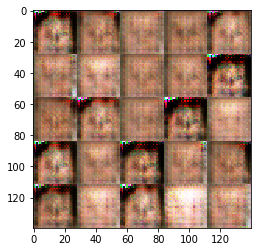

Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.7275
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 1.6962
Epoch 1/1... Discriminator Loss: 0.8119... Generator Loss: 1.2996
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 0.6736... Generator Loss: 1.7820
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 0.4557
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 1.2794
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 1.1963
Epoch 1/1... Discriminator Loss: 0.7427... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 1.5340... Generator Loss: 1.8641


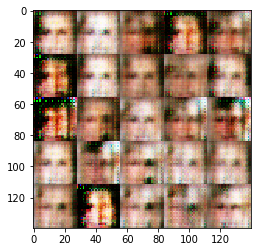

Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 1.2893
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 1.8557
Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 2.4312
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 0.9571
Epoch 1/1... Discriminator Loss: 1.5009... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 0.9264... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.6110... Generator Loss: 1.0880
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 2.1576
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 0.5837


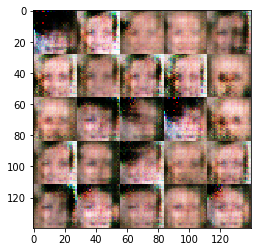

Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 1.6409
Epoch 1/1... Discriminator Loss: 1.0472... Generator Loss: 1.0874
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.3780
Epoch 1/1... Discriminator Loss: 1.8350... Generator Loss: 2.6223
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.5106
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.0461... Generator Loss: 1.4643
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 0.9688
Epoch 1/1... Discriminator Loss: 1.1483... Generator Loss: 0.8657


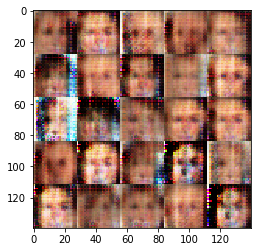

Epoch 1/1... Discriminator Loss: 1.6278... Generator Loss: 0.3067
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 1.3974
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.7272
Epoch 1/1... Discriminator Loss: 0.7014... Generator Loss: 1.4879
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.4190
Epoch 1/1... Discriminator Loss: 2.1219... Generator Loss: 2.6975
Epoch 1/1... Discriminator Loss: 0.7647... Generator Loss: 1.5205
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 1.7284


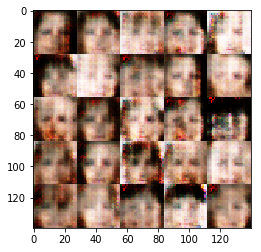

Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 1.2581
Epoch 1/1... Discriminator Loss: 1.1510... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 1.1973
Epoch 1/1... Discriminator Loss: 1.4855... Generator Loss: 0.3839
Epoch 1/1... Discriminator Loss: 1.8690... Generator Loss: 0.2204
Epoch 1/1... Discriminator Loss: 2.2908... Generator Loss: 0.1453
Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 0.4724
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 2.0807
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.5123
Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.5008


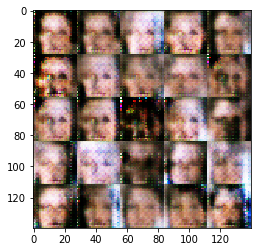

Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 1.6551
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.5576
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 1.3963
Epoch 1/1... Discriminator Loss: 0.6271... Generator Loss: 1.2970
Epoch 1/1... Discriminator Loss: 1.0408... Generator Loss: 0.8155
Epoch 1/1... Discriminator Loss: 0.6903... Generator Loss: 1.3556
Epoch 1/1... Discriminator Loss: 1.6663... Generator Loss: 2.4048
Epoch 1/1... Discriminator Loss: 1.0947... Generator Loss: 0.8952
Epoch 1/1... Discriminator Loss: 0.8478... Generator Loss: 0.9143
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.0793


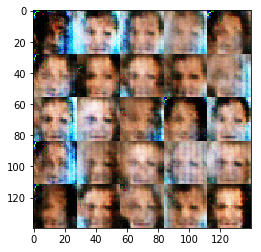

Epoch 1/1... Discriminator Loss: 0.9848... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 1.4536
Epoch 1/1... Discriminator Loss: 0.7500... Generator Loss: 1.3019
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 2.5588
Epoch 1/1... Discriminator Loss: 1.0953... Generator Loss: 1.0162
Epoch 1/1... Discriminator Loss: 0.6610... Generator Loss: 1.4802
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.4811
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 1.4215
Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 1.1653


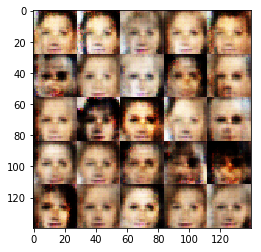

Epoch 1/1... Discriminator Loss: 1.0267... Generator Loss: 0.8357
Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 2.1875... Generator Loss: 2.9012
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 0.9181
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.4827
Epoch 1/1... Discriminator Loss: 1.1276... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 1.3445
Epoch 1/1... Discriminator Loss: 1.2029... Generator Loss: 1.5213
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.1489


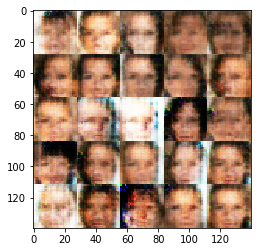

Epoch 1/1... Discriminator Loss: 1.2404... Generator Loss: 1.8332
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.8734
Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.2055... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.4988
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 0.8313


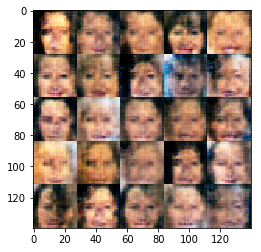

Epoch 1/1... Discriminator Loss: 1.2887... Generator Loss: 0.7931
Epoch 1/1... Discriminator Loss: 0.9433... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.5684
Epoch 1/1... Discriminator Loss: 1.0544... Generator Loss: 1.1771
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 0.8568... Generator Loss: 1.2202
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 1.6245
Epoch 1/1... Discriminator Loss: 1.7290... Generator Loss: 2.6913
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 1.6769
Epoch 1/1... Discriminator Loss: 0.9286... Generator Loss: 1.0231


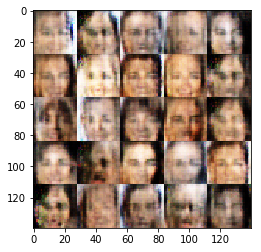

Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 1.7328
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 1.3589
Epoch 1/1... Discriminator Loss: 1.5211... Generator Loss: 0.3908
Epoch 1/1... Discriminator Loss: 0.8853... Generator Loss: 1.4034
Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 0.8175... Generator Loss: 1.2005
Epoch 1/1... Discriminator Loss: 1.6739... Generator Loss: 2.1243
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.6673


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)
    print("finish")

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。